In [9]:
import pandas as pd   
from scipy.spatial.distance import cosine as cosine_distance
from sklearn.metrics import silhouette_score, silhouette_samples
import datetime as dt
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [10]:
def GetSampleMeanDist(sample, dist):
  d = []
  for i, a in enumerate(sample[:-1]):
    for b in sample[i+1:]:
      d.append(dist(a,b))
  return np.mean(d)

In [11]:
keyed_embeddings = None
with open('data/keyed_alarm_subject_embeddings.pickle','rb') as f:
  keyed_embeddings = pickle.load(f)

In [12]:
alr_df = pd.read_csv('data/test_result6.csv')

In [13]:
len(alr_df)

162293

In [14]:
len(set(alr_df["ClusterId"].values))

41991

In [15]:
len(set(alr_df["ClusterId"].values)) / len(alr_df)

0.2587357433777181

In [16]:
clusters = { x:[] for x in set(alr_df["ClusterId"].values)}
cluster_scores = { x:None for x in set(alr_df["ClusterId"].values)}

for cid, subj in  alr_df[["ClusterId","SUBJECT"]].values:
  if subj in keyed_embeddings:
    clusters[cid].append( keyed_embeddings[subj])

for k in dict(clusters):
  if len(clusters[k]) <= 1:
    del clusters[k]
    del cluster_scores[k]

clusterIds =  [ k for k in clusters]

X = []


asd

## Calculate Cluster Quality Idx for each cluster

In [17]:
# Average distance between each sample in a cluster
for k in clusters:
  cluster_scores[k] = GetSampleMeanDist(clusters[k], cosine_distance)

In [18]:
scores = [cluster_scores[k] for k in cluster_scores]

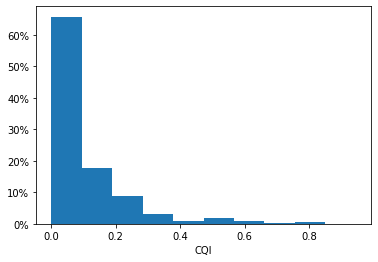

In [31]:
from matplotlib.ticker import PercentFormatter
plt.hist(scores, weights=np.ones(len(scores)) / len(scores))
plt.xlabel("CQI")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [19]:
m_score = np.mean(scores) 
max_score = np.max(scores)

cq_scores = { k: 1 - cluster_scores[k] / max_score for k in cluster_scores}

In [20]:
cq_scores_array = [cq_scores[k] for k in cq_scores]

In [21]:
np.mean(cq_scores_array)

0.8983483930732773

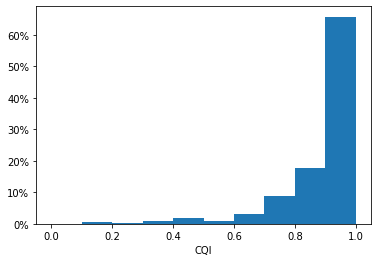

In [22]:
from matplotlib.ticker import PercentFormatter
plt.hist(cq_scores_array, weights=np.ones(len(cq_scores_array)) / len(cq_scores_array))
plt.xlabel("CQI")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [23]:
len(clusters)

15964

In [24]:
scoring_samples = { "ClusterId" : np.random.choice(clusterIds, 100) }

In [25]:
scoring_set =  pd.DataFrame(scoring_samples).set_index("ClusterId").join(alr_df.set_index("ClusterId"), on="ClusterId", how='inner')

In [26]:
scoring_set.to_csv('data/scoring_set.csv')

In [27]:
graded = pd.read_csv('data/scoring_set_graded.csv')[['ClusterId','RCA_GOOD']]

In [28]:
grades = {}
for cluster_id, isgood in graded[['ClusterId','RCA_GOOD']].values:
  grades[int(cluster_id)] = isgood 


In [29]:
np.mean([ grades[k] for k in grades ])

0.58